In [131]:
#Inspired by https://avandekleut.github.io/vae/
import torch;
import torch.nn as nn
import torch.utils
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [132]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [133]:
# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x,start_dim=-2))
])

data = datasets.MNIST('./data',transform=transform,download=True)

In [134]:
n, w, h = data.data.shape
pca_data = data.data.numpy().reshape(n, w*h)


In [181]:
pca = PCA(n_components=2).fit(pca_data)


In [199]:
def alpha(X, mean_vec, eigen_vector): 
    
    return ((X - mean_vec) @ eigen_vector)

In [183]:
pca.components_.T.shape

(784, 2)

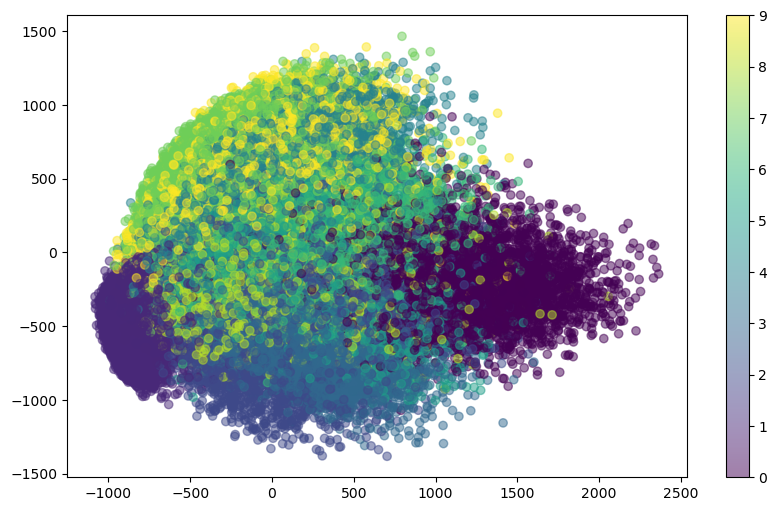

In [236]:
# Plot latent space
plt.figure(figsize=(10,6)) 
plt.scatter(pca.transform(pca_data)[:,0], pca.transform(pca_data)[:,1], c=data.targets, alpha=0.5)
plt.colorbar()
plt.show
plt.savefig('pca.pdf')

In [200]:
made_self = []
for i in range(len(pca_data)): 
    made_self.append(alpha(pca_data[i], pca.mean_, pca.components_.T))



243283.93881962213

In [237]:
def new_image(mean, K, alpha, variance, eigen): 
    sum = 0 
    for i in range(K): 
        sum += alpha[i] * np.sqrt(variance[i]) * eigen[:,i]
    return mean + sum

In [242]:
def plot_reconstructed(w, h, r0=(-1000, 2000), r1=(-1000, 1000), n=12):
    img = np.zeros((n*w, n*h))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            print(x,y)
            x_hat = new_image(pca.mean_, 2, [x,y], pca.explained_variance_, pca.components_.T)
            x_hat = x_hat.reshape(w, h)
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

-1000.0 -1000.0
-727.2727272727273 -1000.0
-454.5454545454545 -1000.0
-181.81818181818176 -1000.0
90.90909090909099 -1000.0
363.63636363636374 -1000.0
636.3636363636365 -1000.0
909.0909090909092 -1000.0
1181.818181818182 -1000.0
1454.545454545455 -1000.0
1727.2727272727275 -1000.0
2000.0 -1000.0
-1000.0 -818.1818181818182
-727.2727272727273 -818.1818181818182
-454.5454545454545 -818.1818181818182
-181.81818181818176 -818.1818181818182
90.90909090909099 -818.1818181818182
363.63636363636374 -818.1818181818182
636.3636363636365 -818.1818181818182
909.0909090909092 -818.1818181818182
1181.818181818182 -818.1818181818182
1454.545454545455 -818.1818181818182
1727.2727272727275 -818.1818181818182
2000.0 -818.1818181818182
-1000.0 -636.3636363636364
-727.2727272727273 -636.3636363636364
-454.5454545454545 -636.3636363636364
-181.81818181818176 -636.3636363636364
90.90909090909099 -636.3636363636364
363.63636363636374 -636.3636363636364
636.3636363636365 -636.3636363636364
909.0909090909092 -6

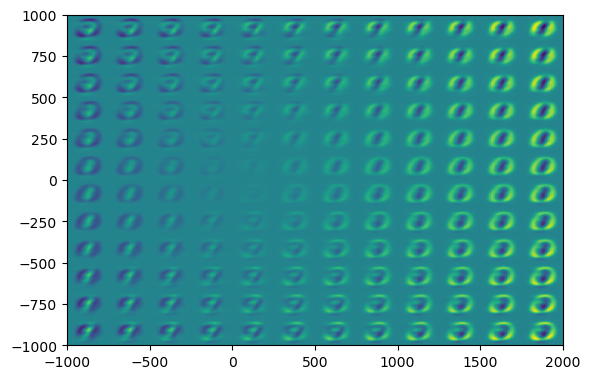

In [243]:
# Plot reconstruction error versus number of latent nodes
plot_reconstructed(28,28)